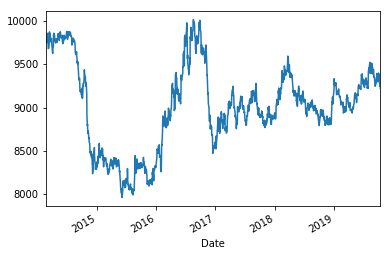

In [138]:
#importing and fitting yen-usd data in PANDAS 
import pandas as pd
%matplotlib inline
from pathlib import Path
import statsmodels.api as sm
from statsmodels.tsa.arima_model import ARMA
from statsmodels.tsa.arima_model import ARIMA
import arch as arch
from arch import arch_model
import numpy as np

csvpath = Path('C:/Users/johnh/Desktop/PREWORK_JSH/Module-8/yen.csv')
df = pd.read_csv(csvpath, parse_dates=True, index_col='Date')
df = df.dropna()
df['Settle'].plot()

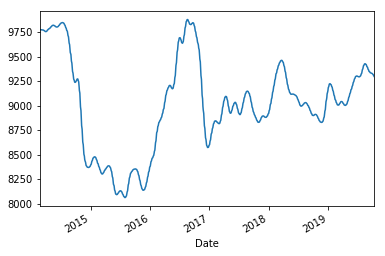

In [134]:
#using holdrick-prescott filter 

df_noise, df_trend = sm.tsa.filters.hpfilter(df["Settle"])
df_trend.plot()


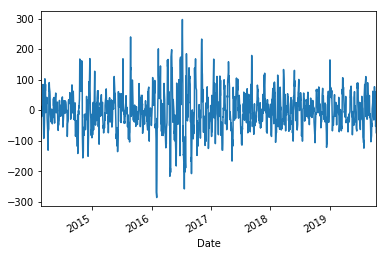

In [135]:
df_noise.plot()

In [139]:
# Transform into a stationary process for ARMA 
df['Return'] = df['Settle'].pct_change()
df = df.dropna()

# Select only the returns
returns = df.loc[:, 'Return']

In [140]:
# Create the ARMA model using the return values and the order
# For the order parameter, the first 2 indicates the number of AR lags
# For the order parameter, the second 1 indicates the number of MA lags

model = ARMA(returns.values, order=(2,1))
ARMA_results=model.fit()

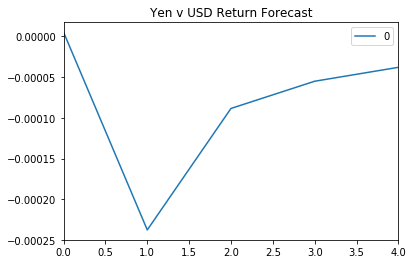

In [141]:
#forecasting for 5 days 
pd.DataFrame(ARMA_results.forecast(steps=5)[0]).plot(title="Yen v USD Return Forecast")

In [142]:
#summarise "reults" for ARMA model
ARMA_results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                              ARMA Model Results                              
==============================================================================
Dep. Variable:                      y   No. Observations:                 1414
Model:                     ARMA(2, 1)   Log Likelihood                5363.646
Method:                       css-mle   S.D. of innovations              0.005
Date:                Tue, 26 May 2020   AIC                         -10717.292
Time:                        12:44:24   BIC                         -10691.021
Sample:                             0   HQIC                        -10707.476
                                                                              
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const       -2.66e-05      0.000     -0.174      0.862      -0.000       0.000
ar.L1.y        0.3008      0.332      0.905      0.366      -0.351       0.952
ar.L2.y        0.0472      0.027      1.776      0.076      -0.005       0.099
ma.L1.y       -0.3140      0.332     -0.945      0.344      -0.965       0.337
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1            2.4121           +0.0000j            2.4121            0.0000
AR.2           -8.7878           +0.0000j            8.7878            0.5000
MA.1            3.1845           +0.0000j            3.1845            0.0000
-----------------------------------------------------------------------------
"""

In [111]:
#engaging ARIMA model
model = ARIMA(df['Settle'], order=(5, 1, 1))
results_arima = model.fit()
results_arima.summary()


C:\Users\johnh\Anaconda3\envs\uncc_fin\lib\site-packages\statsmodels\tsa\base\tsa_model.py:218: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
C:\Users\johnh\Anaconda3\envs\uncc_fin\lib\site-packages\statsmodels\tsa\base\tsa_model.py:218: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)


<class 'statsmodels.iolib.summary.Summary'>
"""
                             ARIMA Model Results                              
==============================================================================
Dep. Variable:               D.Settle   No. Observations:                 1413
Model:                 ARIMA(5, 1, 1)   Log Likelihood               -7505.181
Method:                       css-mle   S.D. of innovations             49.037
Date:                Mon, 25 May 2020   AIC                          15026.363
Time:                        18:51:31   BIC                          15068.391
Sample:                             1   HQIC                         15042.067
                                                                              
==================================================================================
                     coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------
const             -0.3881      1.333     -0.291      0.771      -3.001       2.225
ar.L1.D.Settle    -0.5772      0.306     -1.889      0.059      -1.176       0.022
ar.L2.D.Settle     0.0405      0.031      1.310      0.190      -0.020       0.101
ar.L3.D.Settle     0.0626      0.033      1.873      0.061      -0.003       0.128
ar.L4.D.Settle     0.0024      0.032      0.075      0.940      -0.061       0.066
ar.L5.D.Settle    -0.0608      0.028     -2.192      0.028      -0.115      -0.006
ma.L1.D.Settle     0.5659      0.306      1.850      0.064      -0.034       1.165
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1           -1.3643           -0.0000j            1.3643           -0.5000
AR.2           -0.9382           -1.4304j            1.7106           -0.3424
AR.3           -0.9382           +1.4304j            1.7106            0.3424
AR.4            1.6404           -1.1940j            2.0290           -0.1001
AR.5            1.6404           +1.1940j            2.0290            0.1001
MA.1           -1.7670           +0.0000j            1.7670            0.5000
-----------------------------------------------------------------------------
"""

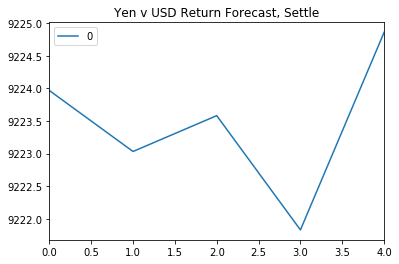

In [112]:
pd.DataFrame(results_arima.forecast(steps=5)[0]).plot(title="Yen v USD Return Forecast, Settle")

In [113]:
# 'p' and 'q'  are akin to the 'p' and 'q' of an ARMA model.
# 'vol="GARCH"' means that we're using a GARCH model.
# The 'mean="Zero"' means that we're estimating a GARCH.
model = arch_model(returns, mean="Zero", vol="GARCH", p=2, q=1)

In [114]:
# Fit the GARCH Model
Garch = model.fit(disp="off")
Garch.summary()

C:\Users\johnh\Anaconda3\envs\uncc_fin\lib\site-packages\arch\univariate\base.py:293: DataScaleWarning: y is poorly scaled, which may affect convergence of the optimizer when
estimating the model parameters. The scale of y is 2.977e-05. Parameter
estimation work better when this value is between 1 and 1000. The recommended
rescaling is 100 * y.

This warning can be disabled by either rescaling y before initializing the
model or by setting rescale=False.

  data_scale_warning.format(orig_scale, rescale), DataScaleWarning
C:\Users\johnh\Anaconda3\envs\uncc_fin\lib\site-packages\arch\univariate\base.py:709: ConvergenceWarning: The optimizer returned code 8. The message is:
Positive directional derivative for linesearch
See scipy.optimize.fmin_slsqp for code meaning.

  ConvergenceWarning,


<class 'statsmodels.iolib.summary.Summary'>
"""
                       Zero Mean - GARCH Model Results                        
==============================================================================
Dep. Variable:                 Return   R-squared:                       0.000
Mean Model:                 Zero Mean   Adj. R-squared:                  0.001
Vol Model:                      GARCH   Log-Likelihood:                5438.18
Distribution:                  Normal   AIC:                          -10868.4
Method:            Maximum Likelihood   BIC:                          -10847.3
                                        No. Observations:                 1414
Date:                Mon, May 25 2020   Df Residuals:                     1410
Time:                        18:51:32   Df Model:                            4
                              Volatility Model                              
============================================================================
                 coef    std err          t      P>|t|      95.0% Conf. Int.
----------------------------------------------------------------------------
omega      5.9534e-07  1.744e-11  3.414e+04      0.000 [5.953e-07,5.954e-07]
alpha[1]       0.0250  1.086e-02      2.302  2.135e-02 [3.713e-03,4.629e-02]
alpha[2]       0.0250  8.056e-06   3103.417      0.000 [2.498e-02,2.502e-02]
beta[1]        0.9300  9.439e-03     98.530      0.000     [  0.912,  0.948]
============================================================================

Covariance estimator: robust
WARNING: The optimizer did not indicate successful convergence. The message was Positive directional derivative for linesearch.
See convergence_flag.

"""

In [115]:
# Construct Volatility Forecasts for the next 5 days
forecast_horizon = 5
# Take the last day of the data we used above. 
forecasts = Garch.forecast(start='2019-10-15', horizon=forecast_horizon)
forecasts

In [116]:
# Annualize the forecast
intermediate = np.sqrt(forecasts.variance.dropna() * 252)
intermediate

,h.1,h.2,h.3,h.4,h.5
Date,,,,,
2019-10-15,0.069372,0.069891,0.070252,0.070607,0.070954


In [117]:
# The name of the column here is the date of the forecast.
# Each row represents the forecast of volatility for the following days.
# Transposing makes the forecast easier to plot
final = intermediate.dropna().T
final

Date,2019-10-15 00:00:00
h.1,0.069372
h.2,0.069891
h.3,0.070252
h.4,0.070607
h.5,0.070954


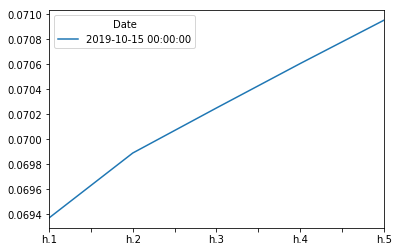

In [118]:
final.plot()